Elaborar un análisis de los datos provistos por la empresa Vincorte donde se realice un correcto análisis sobre cómo se relacionan las propiedades y la calidad del vino y de esta manera también conocer la excelencia de cada 
uno de los productos.

In [303]:
#Librerias
import pandas as pd #libreria de visualización y modelado de datos
import matplotlib.pyplot as plt #libreria gráfica
import seaborn as sns #libreria gráfica
 
from sklearn import linear_model #funcion de la libreria sklearn para hacer regresión lineal
from sklearn.model_selection import train_test_split #funcion de la libreria sklearn para dividir los datos para entrenamiento y test del modelo

#evaluadores del modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


##**Lectura de base**

In [322]:
#llamamos los datos

#_----------------------------------------------------------
#cuando descargue, borra esto
#se llaman los datos desde la ubicación en drive

ruta='/content/drive/MyDrive/Meli/jhon/Regresion lineal/' 
nombre='Calidad_de_Vino.csv'
Datos=pd.read_csv(ruta + nombre)
#-----------------------------------------------------------

#descomentar esto cuando se descargue
#Para datos desde pc se llama asi:
#Datos=pd.read_csv('Calidad_de_Vino.csv') 



Datos.head() #para visualizar las columnas y primeras 5 filas

,acidez fija,acidez volatil,acido citrico,azucar residual,cloruros,dioxido de azufre libre,dioxido de azufre total,densidad,pH,sulfatos,alcohol,calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [64]:
#tamaño del dataframe: 1599 filas y 12 columnas
Datos.shape

(1599, 12)

##**Analisis de los datos**

En la siguiente línea, se puede notar que el dataframe no tiene datos nulos o vacios. ademas se pueden ver que todas sus columnas son númericas.

In [65]:
#vemos información general del dataframe
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   acidez fija              1599 non-null   float64
 1   acidez volatil           1599 non-null   float64
 2   acido citrico            1599 non-null   float64
 3   azucar residual          1599 non-null   float64
 4   cloruros                 1599 non-null   float64
 5   dioxido de azufre libre  1599 non-null   float64
 6   dioxido de azufre total  1599 non-null   float64
 7   densidad                 1599 non-null   float64
 8   pH                       1599 non-null   float64
 9   sulfatos                 1599 non-null   float64
 10  alcohol                  1599 non-null   float64
 11  calidad                  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


En la siguiente linea, veremos datos estadísticos basicos para cada columna del dataframe, como son la cantidad de datos, la media, desviacion estandar, valor minimo y maximo, y los percentiles 25, 50 y 75 

In [66]:
#Miramos datos estadisticos básicos de cada columna
Datos.describe()


,acidez fija,acidez volatil,acido citrico,azucar residual,cloruros,dioxido de azufre libre,dioxido de azufre total,densidad,pH,sulfatos,alcohol,calidad
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


###Exploremos la calidad del vino

Vemos que el dataset tiene calidad númerica que va desde 3 a 8

In [67]:
#Exploremos la variable calidad.
Datos.calidad.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: calidad, dtype: int64

Vemos que la mayor parte de los vinos tienen una calificación de calidad entre 5 y 6

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

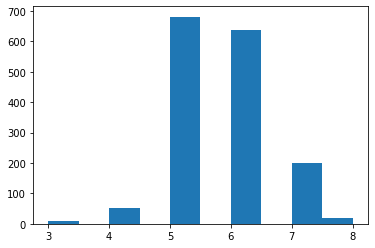

In [68]:
#Histograma de calidad
plt.hist(Datos.calidad)

Para las siguientes gráficas encontramos lo siguiente:
+ la acidez fija no da ninguna especificación para clasificar la calidad.
+ Cuando la acidez volátil tiende a ser baja, la calificación de calidad es alta.
+ Cuando el acido cítrica tiende a ser alta, la calificación de calidad es alta.
+ el azucar residual, la densidad y el PH no nos da mucha información acerca de la calidad del vino.
+ los cloruros tienen una tendencia a ser bajos cuando la calificación de calidad es alta
+ Cuando los sulfatos son altos, la calidad tiende a ser alta
+ cuando el alcohol tiende a ser alto, la calidad es alta

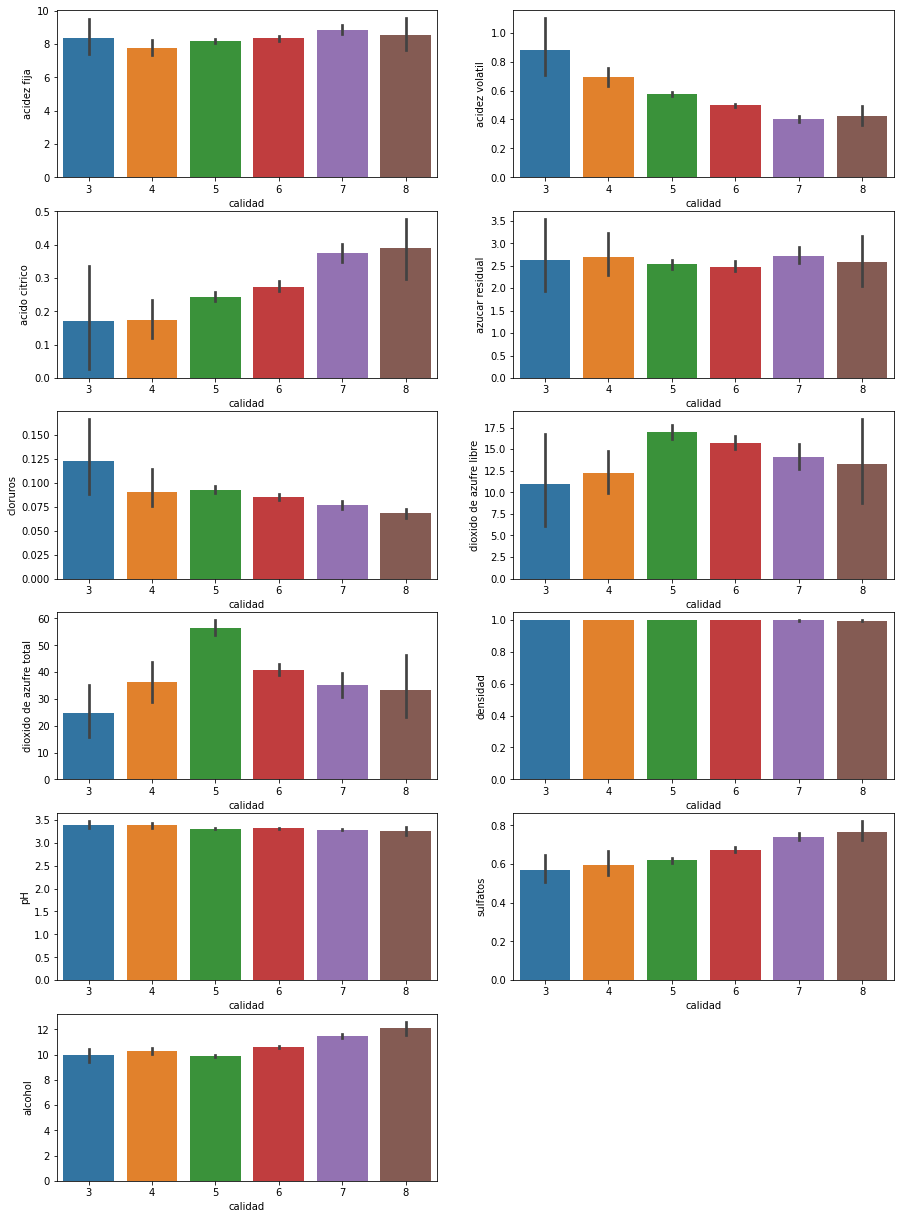

In [69]:
#grafico de barras para comparar calidad con las otras variables.

fig = plt.figure(figsize = (15,40))
N=len(Datos.columns) #cantidad de columnas
for i in range(N-1):
  ax=fig.add_subplot(N-1, 2, i+1)
  sns.barplot(x = 'calidad', y = Datos.columns[i], data = Datos)


De las gráficas anteriores, podemos concluir que aquellas variables que tienen una correlación lineal con la variable calidad son:
  + acidez volatil
  + acido citrico
  + cloruros
  + sulfatos
  + alcohol


##**Modelado de los datos**

Para empezar, se distinguirá la calidad de los datos entre calidad buena o mala. se selecciona como calidad mala (0), para calificaciones menores a 6, y como calidad buena (1) para calificaciones mayores o iguales a 6

In [95]:
#distincion de calidad
bins = (2, 5.5, 8)
calificadores = ['malo', 'bueno']
Label=[0, 1]
Datos['calidad_categorica'] = pd.cut(Datos['calidad'], bins = bins, labels = calificadores)
Datos['label_calidad'] = pd.cut(Datos['calidad'], bins = bins, labels = Label)


In [96]:
Datos.head()

,acidez fija,acidez volatil,acido citrico,azucar residual,cloruros,dioxido de azufre libre,dioxido de azufre total,densidad,pH,sulfatos,alcohol,calidad,calidad_categorica,label_calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,malo,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,malo,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,malo,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,bueno,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,malo,0


Luego de clasificar la calidad del vino, procedemos a separar los datos para entrenamiento y test, escogemos un 85% de los datos para entrenar, y un 15% restante para testear el modelo de regresión lineal.

In [261]:
#utilizando la función train_test_split de sklearn:

#seleccionamos las variables independientes que entraran el el modelo.
#variables que se vieron anteriormente, las cuales influian en el comportamiento de la variable calidad.

X=Datos[['acidez volatil','acido citrico','cloruros','sulfatos','alcohol']]


#Variable calidad, que nos separa numericamente entre bueno o malo la calidad del vino
y=Datos[['calidad']]


In [270]:
#para encontrar el random_state que da la mayor precision posible.
#i=508 score=0.47478086891269966

for i in range(1000):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=i)
  Regresion=linear_model.LinearRegression()
  Regresion.fit(X_train,y_train)
  Score=Regresion.score(X_test,y_test)
  #if Score>=0.4:
    #print(i,Score)

In [271]:
#Dividimos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=508)

Entrenamos el modelo de regresión lineal con los valores X_train  y y_train

In [272]:
Regresion=linear_model.LinearRegression()
Regresion.fit(X_train,y_train)

LinearRegression()

In [325]:
#calculamos la prediccion para el set de datos de test
Prediccion=Regresion.predict(X_test)


### Rendimiento del modelo de regresión lineal

In [274]:

#miramos la precisión del modelo comparando los datos reales con la prediccion:
Regresion.score(X_test,y_test)

0.47478086891269966


del anterior calculo, podremos notar que la regresión lineal en este caso para la calidad de vinos tiene una precisión de 47.48% aproximadamente. Debemos tener en cuenta que la calidad del vino esta dada como una calificación en numéros enteros, mientras que la predicción de la calidad para el test, esta dada con números decimales.

Hacemos grafica comparativa de las variables usadas vs el label de la calidad de vinos real y el label de la prediccion

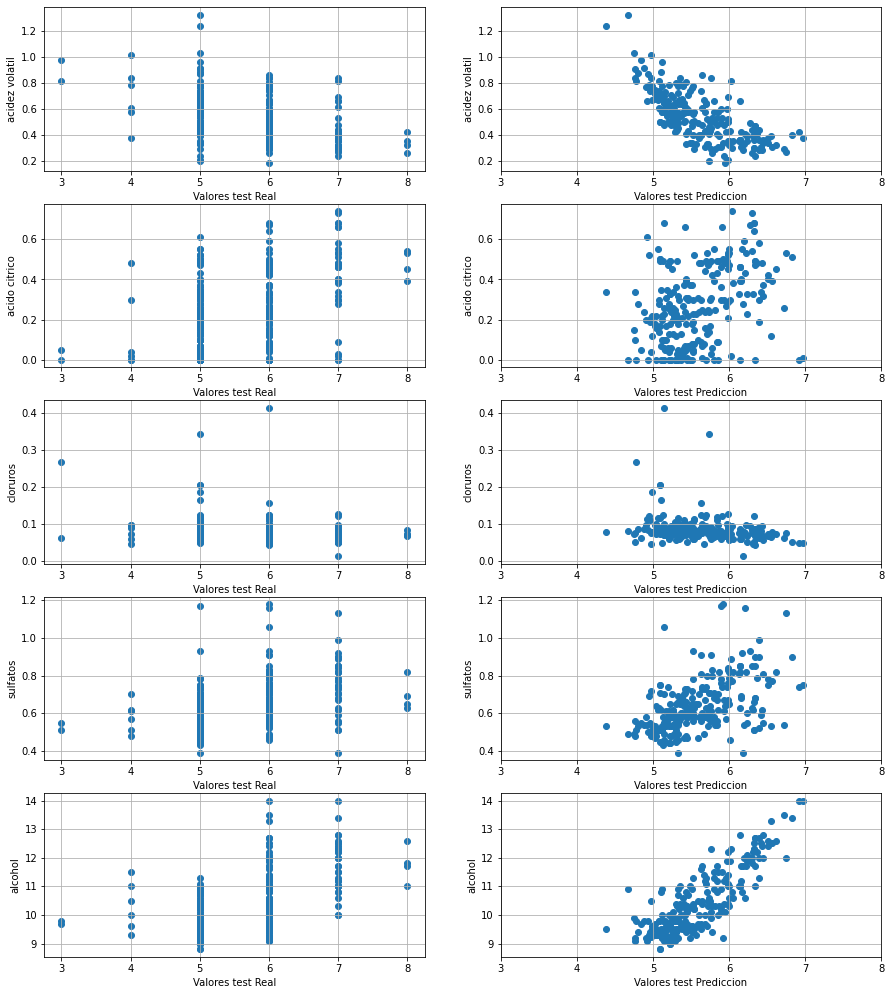

In [280]:
fig = plt.figure(figsize = (15,50))

N_valores=len(X_test.columns)
for i in range(N):
  ax=fig.add_subplot(N, 2, (2*i+1))
  plt.scatter(y_test['calidad'],X_test[X_test.columns[i]])
  plt.xlabel('Valores test Real')
  plt.ylabel(X_test.columns[i])
  plt.grid()

  ax=fig.add_subplot(N, 2, 2*(i+1))
  plt.scatter(Prediccion,X_test[X_test.columns[i]])
  plt.xlabel('Valores test Prediccion')
  plt.ylabel(X_test.columns[i])
  plt.xlim(3,8)
  plt.grid()

  if X_test.columns[i]=='alcohol':
    break




Agregamos la prediccion y categoria de la prediccion a la base de datos completa. Para valores menores o iguales que 0.5 la prediccion indica que la calidad del vino es mala, y para valores mayores a 5.5, la prediccion indica que la calidad del vino es buena

In [285]:
#agregamos predict a los datos totales
#Datos1=Datos.drop(['calidad','label_calidad','calidad_categorica'],axis=1)
Datos['Prediccion']=Regresion.predict(X)

#distincion de prediccion de la calidad
bins = (2, 5.5, 8)  
calificadores = ['malo', 'bueno']
Label=[0, 1]
Datos['prediccion_categorica'] = pd.cut(Datos['Prediccion'], bins = bins, labels = calificadores)
Datos['label_prediccion'] = pd.cut(Datos['Prediccion'], bins = bins, labels = Label)



In [286]:
Datos.head()

,acidez fija,acidez volatil,acido citrico,azucar residual,cloruros,dioxido de azufre libre,dioxido de azufre total,densidad,pH,sulfatos,alcohol,calidad,calidad_categorica,label_calidad,Prediccion,prediccion_categorica,label_prediccion
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,malo,0,5.092072,malo,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,malo,0,5.048262,malo,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,malo,0,5.176216,malo,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,bueno,1,5.677621,bueno,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,malo,0,5.092072,malo,0


Luego de categorizar la prediccón de la calidad de los vinos, encontramos que la exactitud del modelo de regresión lineal es de aproximadamente 74.36%


In [302]:
#Vemos la exactitud de la prediccón para todos los datos  
accuracy_score(Datos.label_calidad, Datos.label_prediccion)

0.7435897435897436

In [319]:
#creamos matriz de confusión para ver el numero de predicciones correctas e incorrectas que obtuvo el modelo.
Matriz_Confusion=confusion_matrix(Datos.label_calidad, Datos.label_prediccion)
Co=('Malo','Bueno')
C1=(Matriz_Confusion[0][0],Matriz_Confusion[1][0])
C2=(Matriz_Confusion[0][1],Matriz_Confusion[1][1])

Matriz=pd.DataFrame({' ':Co,
                         'Malo':C1,
                         'Bueno':C2})

Matriz.head()

,,Malo,Bueno
0,Malo,532,212
1,Bueno,198,657


En el siguiente grafico vemos como se distribuyen los datos de calificación categorica reales y de predicción para todo el dataframe

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


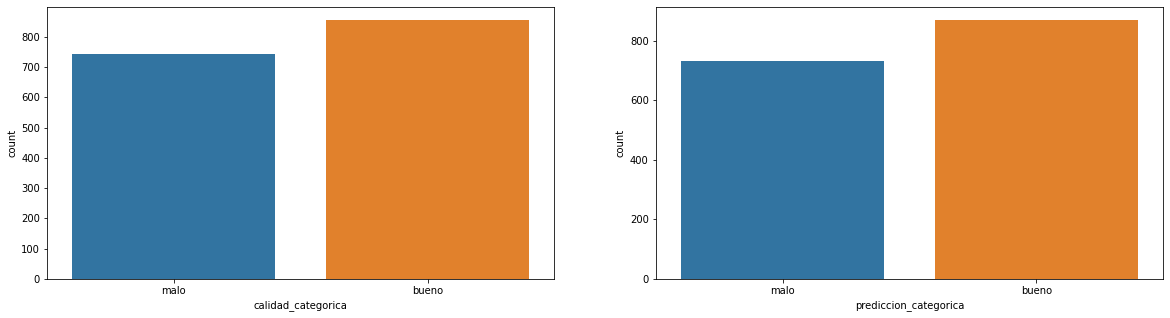

In [294]:
fig = plt.figure(figsize = (20,5))

ax=fig.add_subplot(1, 2, 1)
sns.countplot(Datos.calidad_categorica)

ax=fig.add_subplot(1, 2, 2)
sns.countplot(Datos.prediccion_categorica)

